# Fragmenting Compounds


## Background

A [fragment](https://www.frontiersin.org/articles/10.3389/fmolb.2020.00180/full#:~:text=Fragment%2Dbased%20drug%20discovery%20(FBDD,in%20target%2Dbased%20drug%20discovery.) is essentially a small molecule that has a low molecular weight and small size, often representing a small part of a bigger, drug-like compound. These small compounds are of great importance in drug discovery, especially in the early stages. Fragments are used to identify small chemical and functional groups that bind, even if weakly, to the target of interest and thus serve as useful starting points in a [medicinal chemistry](https://en.wikipedia.org/wiki/Medicinal_chemistry) campaign. Once identified, fragments act as building blocks and are subsequently chemically modified (addition/removal of specific chemical groups) to improve the overall interaction of the newly generated compounds with the target of interest. 

Generally speaking, fragments will follow the [rule of three](https://www.sciencedirect.com/science/article/abs/pii/S1359644603028319?via%3Dihub). However, this is not always the case. Different researchers will have their own definitions of what is deemed a fragment:

1. **Molecular weight less than 300 Da**
2. **ClogP value less than 3**
    1. ClogP is a well established measure of a compound’s hydrophilicity which is important for absorption, permeation, and other drug-related physical properties.
3. **Less than 3 hydrogen donor and acceptor groups.**

Existing molecules can also be split into smaller fragments, a good visual is shown below of the fragmentation process: 

![Fragment_1.png](./images/Fragment_1.png)

[***Source***](https://www.frontiersin.org/articles/10.3389/fchem.2018.00229/full)

## Fragment-Based Approaches for Compound Optimization

Standard fragment-based approaches for compound optimization are: 

1. **Fragment growing** - adding chemical groups to the fragment to improve properties.
2. **Fragment merging/scaffold hopping** - combining fragments that have an overlapped binding site.
3. **Fragment linking** - linking two or more fragments together to drastically improve [binding affinities](https://www.malvernpanalytical.com/en/products/measurement-type/binding-affinity#:~:text=What%20is%20Binding%20Affinity%3F,(e.g.%20drug%20or%20inhibitor).).

You can read more about these methods in detail [here](https://www.frontiersin.org/articles/10.3389/fmolb.2020.00180/full). 

## Fragment Generation

![Fragment_2.png](./images/Fragment_2.png)

***[Source](https://www.researchgate.net/figure/A-schematic-overview-of-a-molecular-fragmentation-process-For-a-single-step_fig2_353714355)***

Fragments are essentially generated by breaking specified bonds in a larger molecule. There are multiple ways approaches that one can take to fragment a molecule. The methods covered below include; RECAP, BRICS, FraggleSim and AnyBreak. 

1. **RECAP - R**etrosynthetic **C**ombinatorial **A**nalysis **P**rocedure 
    1. Alkyl groups smaller than five carbons and cyclic bonds are left intact while compounds are dissected based on 11 pre-specified bond types
2. **BRICS -** **B**reaking **R**etrosynthetically **I**nteresting **C**hemical **S**ubstructures
    1. In BRICS, compounds are dissected based on 16 bond types while considering the chemical environment and surrounding substructures. 
    2. Both RECAP and BRICS are examples of systematic fragmentation
3. **FraggleSim**
    1. RDKit uses the Fraggle similarity algorithm developed by Jameed Hussain and Gavin Harper of GSK. Read more about the details of the algorithm [here](https://raw.github.com/rdkit/UGM_2013/master/Presentations/Hussain.Fraggle.pdf) and [here](https://www.rdkit.org/docs/source/rdkit.Chem.Fraggle.FraggleSim.html).
4. **AnyBreak**
    1. This method uses BRICS first and fallback to generating all possible fragmentation if it doesn't work. 

**Note:** It’s challenging to point to one method and refer to it as the status quo. The method you should use depends on what exactly you are trying to do with the fragments, the types of molecules you’re working with etc. Generally speaking, it is ideal to fragment a molecule in a way that is synthesizable in the lab, and each of the methods listed above have slight variations in their approach. There’s no point fragmenting a molecule at certain bonds if these bonds have never been broken before in a lab setting, it’s not realistic. 

Once molecules are fragmented, the next step is typically a matched molecular pair analysis (MMPA). This analysis compares the chemical structure of two molecules that only differ by a **single chemical transformation** (i.e. changing one functional group). MMP’s are useful to analyze a large collection of compounds because the minimal structural differences make it much easier to interpret any observable changes in physical or biological properties. We will not cover MMPA’s in this tutorial. See below for a visualization of a matched molecular pair: 

![Fragment_3.png](./images/Fragment_3.png)

[Source](https://en.wikipedia.org/wiki/Matched_molecular_pair_analysis#:~:text=Matched%20molecular%20pair%20analysis%20(MMPA,matched%20molecular%20pairs%20(MMP).)

**Note:** Sometimes the term fragment is used synonymously with scaffolds. However, scaffolds are better defined as key core structures of a compound, often critical and essential for binding, whereas a fragment may only partially match with a “core structure”. 

## Tutorial

Now let’s walkthrough how you could do this in RDKit and then compare it with Datamol. Starting from a cluster of molecules, this tutorial will cover the following:

1. Generate list of all fragments in different ways as described above
    1. RECAP, BRICS, FraggleSim
2. Show how to return the results as a hierarchy of nodes instead of just a visualized set of fragments allowing for more flexibility in the manipulation of the results
3. Fragment molecules on specific bonds suitable for an MMP analysis
4. Briefly exploring other manipulations
    1. Assembling - assemble fragments to create new molecules. Limit the number of fragments you’d work with because it’s computationally intensive.
    2. Decomposition - break a molecule down to get non-overlapping fragments and how they are linked.

## RDKit Example

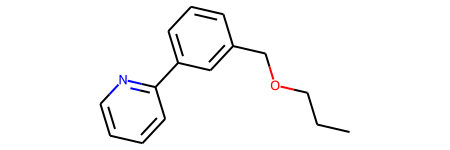

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import BRICS
from rdkit.Chem import Recap

from rdkit.Chem.Fraggle import FraggleSim

smiles = "CCCOCc1cc(c2ncccc2)ccc1"
mol = Chem.MolFromSmiles(smiles)

mol

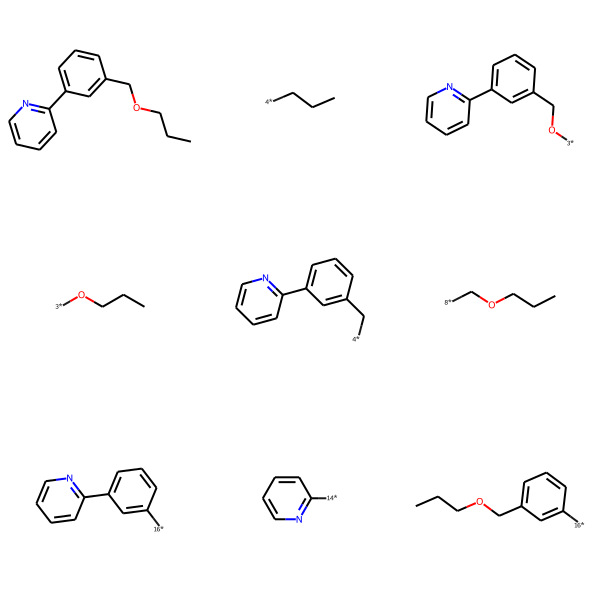

In [2]:
# Decompose compounds based on BRICS algorithm.
# Calling dm.fragment.brics runs this algorithm, as well as fixes/sanitizes fragments in one line of code.

brics_frags = BRICS.BRICSDecompose(mol, returnMols=True, singlePass=True)
brics_frags = list(brics_frags)
MolsToGridImage(brics_frags)

# Recap, FraggleSim and rdMMPA can be run in a similar manner as the BRICS algorithm above.

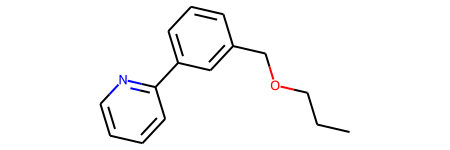

In [3]:
import datamol as dm

smiles = "CCCOCc1cc(c2ncccc2)ccc1"
mol = dm.to_mol(smiles)
mol

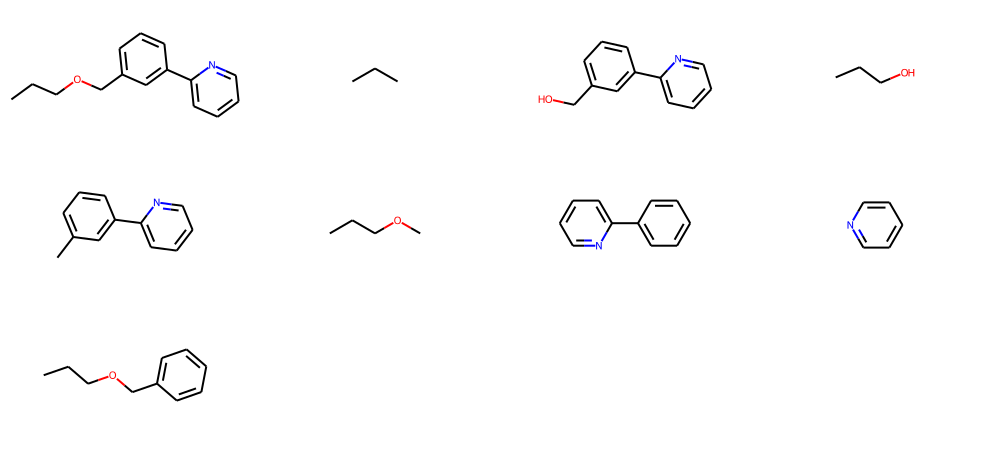

In [4]:
# BRICS
with dm.without_rdkit_log():
    frags = dm.fragment.brics(mol)

dm.to_image(frags, mol_size=(250, 150))

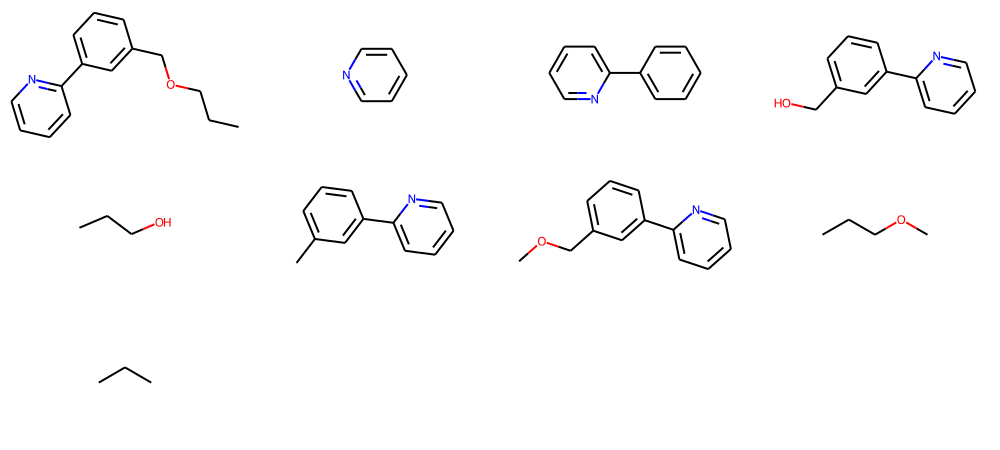

In [5]:
# FraggleSims
with dm.without_rdkit_log():
    frags = dm.fragment.frag(mol)

dm.to_image(frags, mol_size=(250, 150))

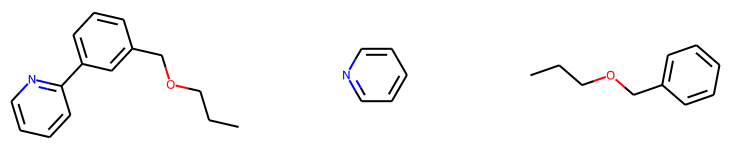

In [6]:
# Recap
with dm.without_rdkit_log():
    frags = dm.fragment.recap(mol)

dm.to_image(frags, mol_size=(250, 150))

What you can also do is assemble some new molecules based off a list of fragments. This is how fragments are used as building blocks for larger, more optimized molecules. By having an understanding of the properties of the underlying fragments, you can essentially run a “mix and match” process to generate optimal molecules. 

Assembling molecules from fragments is computationally expensive. Make sure you use the parameters: 

- ***frags***
- **max_n_mols**

To limit the number of fragments to work with and the number of molecules to be assembled. 

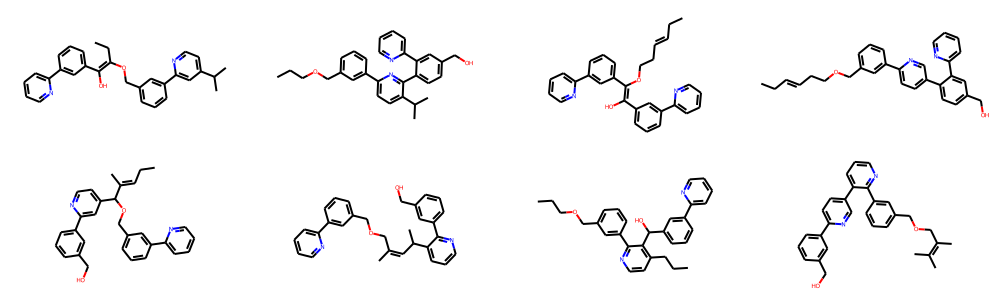

In [7]:
# Assembling new molecules based on a list of fragments
# Get the fragment set of a molecule
smiles = "CCCOCc1cc(c2ncccc2)ccc1"
mol = dm.to_mol(smiles)

with dm.without_rdkit_log():
    frags = dm.fragment.brics(mol)

# Limit the number of fragments to work with because assembling is computationally intensive.
frags = frags[:3]

# Assemble 8 molecules from the list of fragments
with dm.without_rdkit_log():
    mols = list(dm.fragment.assemble_fragment_order(frags, max_n_mols=8))

dm.to_image(mols, mol_size=(250, 150))

In [8]:
# Decomposition
# It's also possible to break a molecule based on a set of chemical transformation and gets the non-overlapping fragments and how they are linked

with dm.without_rdkit_log():
    results = dm.fragment.break_mol(mol, randomize=False, mode="brics", returnTree=True)

results

(['CCC', 'O', 'C', 'c1ccncc1', 'c1ccccc1'],
 {'C',
  'CCC',
  'CCCOCc1cccc(-c2ccccn2)c1',
  'Cc1cccc(-c2ccccn2)c1',
  'O',
  'OCc1cccc(-c2ccccn2)c1',
  'c1ccc(-c2ccccn2)cc1',
  'c1ccccc1',
  'c1ccncc1'},
 <networkx.classes.digraph.DiGraph at 0x7f7de839b790>)

## References

- [https://pubs.acs.org/doi/pdf/10.1021/acs.jcim.6b00596](https://pubs.acs.org/doi/pdf/10.1021/acs.jcim.6b00596)
- RDKit Cook Book - Creating fragments - [https://www.rdkit.org/docs/Cookbook.html#create-fragments](https://www.rdkit.org/docs/Cookbook.html#create-fragments)